In [2]:
%pip install tensorflow opencv-python matplotlib

  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip list #lists out all the packages and version of those packages installed

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
applaunchservices                 0.3.0
appnope                           0.1.2
appscript                         1.1.2
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                   

In [2]:
import tensorflow as tf
import os

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
#gpus = tf. config.experimental.list_physical_ devices('GPU")
#for gpu in gpus:
#tf.config.experimental.set_memory_growth (gpu, True)
cpus = tf.config.experimental.list_physical_devices('CPU')

In [ ]:
#Make my DL model differentiate between clean water and polluted water

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [4]:
data_directory = 'data'

In [5]:
image_types = ['jpeg', 'jpg', 'bmp', 'png']

In [22]:
#specific_img = cv2.imread(os.path.join('data', 'Polluted Water', '124260981_l-water-pollution.jpg'))
#plt.imshow(cv2.cvtColor(specific_img, cv2.COLOR_BGR2RGB))

In [7]:
#REMOVING BAD IMAGES
for image_class in os.listdir(data_directory):
    for image in os.listdir(os.path.join(data_directory, image_class)):
        image_path = os.path.join(data_directory, image_class, image)
        try: 
            img = cv2.imread(image_path) #checking if we can load img into opencv
            type = imghdr.what(image_path) #checking what type of image we have
            if type not in image_types:
                print('Image is not found in type list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with the image {}'.format(image_path))

FileNotFoundError: [Errno 2] No such file or directory: 'data'

In [29]:
#LOADING DATA
import numpy as np

In [28]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 219 files belonging to 2 classes.


In [30]:
data_iterator = data.as_numpy_iterator()#loops through it

In [31]:
batch = data_iterator.next() #Gets another batch from the iterator

In [32]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [33]:
batch[1]# 1 or 0 represent the class. 0 = clean water 1 = polluted water
#Images will be in key 0
#Labels or class will be in key 1

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int32)

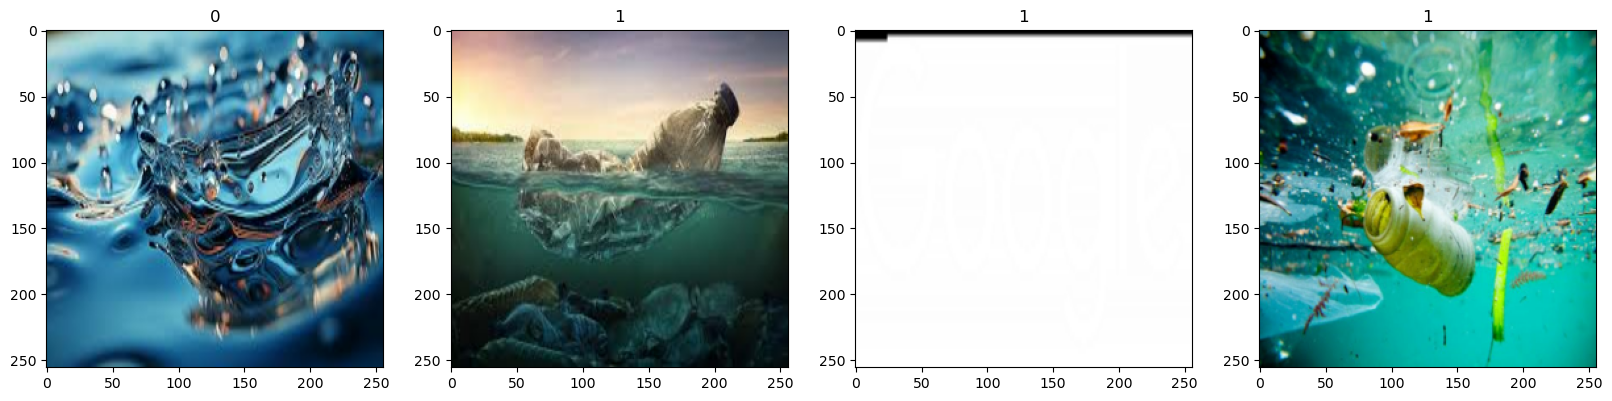

In [34]:
#FIGURE OUT WAHT THIS IS DOING ASK GPT
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]) :
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [35]:
#Preprocessing data

In [36]:
data = data.map(lambda x, y: (x/255, y)) 

In [37]:
scaled_iterator = data.as_numpy_iterator()

In [38]:
batch = scaled_iterator.next()
batch[0].max()

1.0

In [1]:
#FIGURE OUT WAHT THIS IS DOING ASK GPT
figure, axis = plt.subplots(num_cols = 4, fig_size=(20,20))
for index, image in enumerate(batch[0][:4]) :
    ax[index].imshow(image)
    ax[index].title.set_text(batch[1][index])

NameError: name 'plt' is not defined

In [40]:
#SPLITTING DATA
train_size = int(len(data)*0.7) #used to actually train DL model
val_size = int(len(data)*0.2)+1 #evaluate model while training
test_size = int(len(data)*0.1)+1 #used to test DL model after 

In [41]:
#partion data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [43]:
model = Sequential()

In [44]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) 
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu')) 
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
                  
model.add(Flatten())
                  
model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [48]:
#fitting model is training the model
#an epoch is 1 run over the training set so 20 is 20 runs over the training set
training = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 526ms/step - accuracy: 0.4167 - loss: 1.0446 - val_accuracy: 0.5312 - val_loss: 0.6871
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - accuracy: 0.5594 - loss: 0.6855 - val_accuracy: 0.5000 - val_loss: 0.6618
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 474ms/step - accuracy: 0.4552 - loss: 0.6879 - val_accuracy: 0.5625 - val_loss: 0.6707
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 450ms/step - accuracy: 0.4906 - loss: 0.6787 - val_accuracy: 0.6406 - val_loss: 0.6242
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 468ms/step - accuracy: 0.6917 - loss: 0.6251 - val_accuracy: 0.6562 - val_loss: 0.5900
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 454ms/step - accuracy: 0.6510 - loss: 0.6417 - val_accuracy: 0.7500 - val_loss: 0.6147
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step - accuracy: 0.8000 - loss: 0.5875 - val_accuracy: 0.8750 - val_loss: 0.5721
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 463ms/step - accuracy: 0.8990 - loss: 0.6095 - val_accuracy: 0.8750 - val_loss:

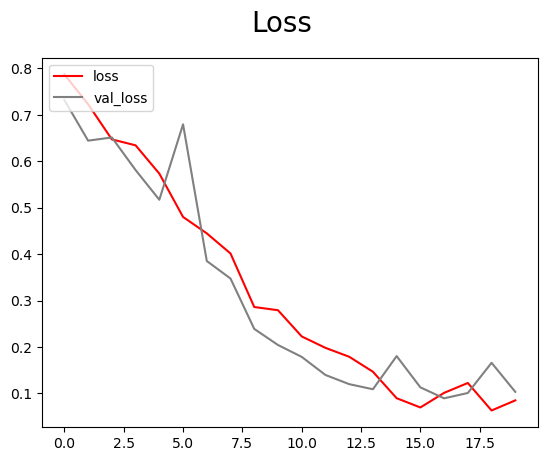

In [353]:
#PLOT PERFORMANCE
fig = plt.figure()
plt.plot(training.history['loss'], color='red', label='loss')
plt.plot(training.history['val_loss'], color='gray', label='val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

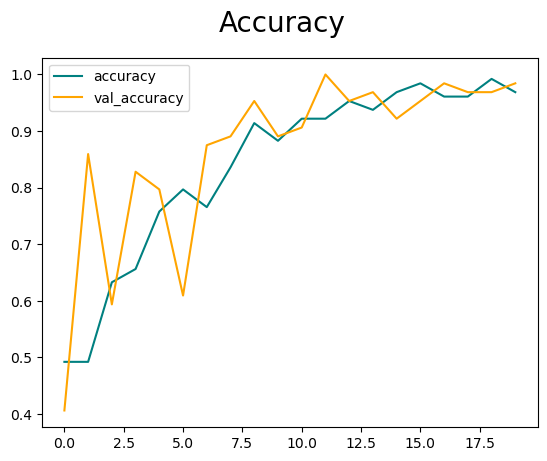

In [357]:
fig = plt.figure()
plt.plot(training.history['accuracy'], color='teal', label='accuracy') 
plt.plot(training.history['val_accuracy'], color='orange', label='val_accuracy') 
fig.suptitle('Accuracy', fontsize=20) 
plt.legend(loc="upper left") 
plt.show()

In [49]:
#EVALUATE PERFORMACE
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [50]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    ypred = model.predict(X)
    precision.update_state(y, ypred)
    recall.update_state(y, ypred)
    accuracy.update_state(y, ypred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


2024-08-01 23:03:55.740977: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [51]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}')

Precision:1.0, Recall:0.9375, Accuracy:0.9629629850387573


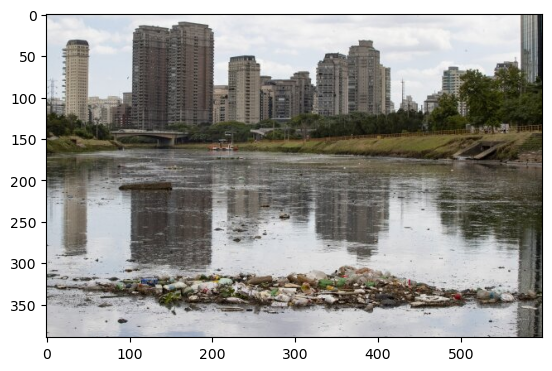

In [52]:
img = cv2.imread('90.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

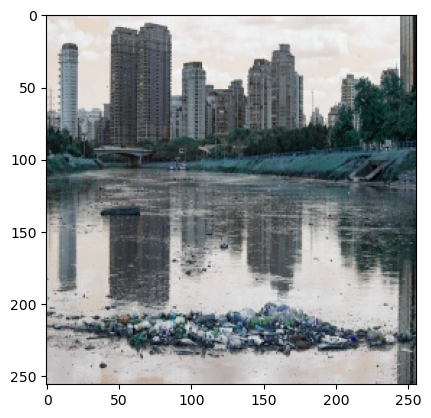

In [53]:
resized_image = tf.image.resize(img, (256, 256))
plt.imshow(resized_image.numpy().astype(int))
plt.show()

In [55]:
ypred = model.predict(np.expand_dims(resized_image/255, 0))
ypred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.68399847]], dtype=float32)

In [56]:
if ypred < 0.5:
    print(f'The model predicts this is clean water')
else:
    print(f'The model predicts this is polluted water')

The model predicts this is polluted water


In [61]:
#SAVE THE MODEL
from tensorflow.keras.models import load_model

In [57]:
model.save(os.path.join('models', 'PollutedvsCleanModel.keras'))

In [62]:
new_model = load_model(os.path.join('models', 'PollutedvsCleanModel.h5'))

In [ ]:
new_model

<Sequential name=sequential_7, built=True>